### Load the modules and dataset

In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, auc, roc_curve, precision_recall_curve, classification_report)
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve, classification_report, accuracy_score,log_loss
import warnings 
from sklearn.feature_selection import RFE
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r'D:\Data\project data for practice\Loan_data_train.csv')
test=pd.read_csv(r'D:\Data\project data for practice\loan_data_test.csv')
 

### Exploratory data analysis

Univariate statistics summarize only one variable at a time. Bivariate statistics compare two variables. Multivariate statistics compare more than two variables.

In [3]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

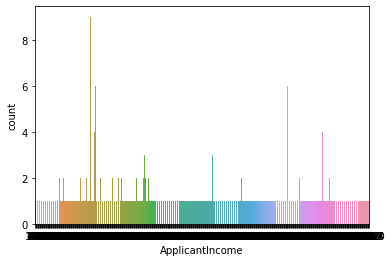

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

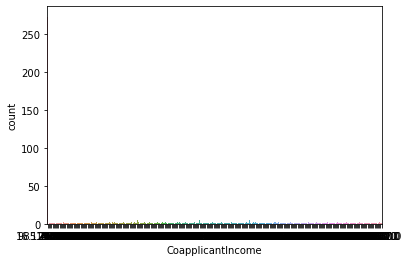

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

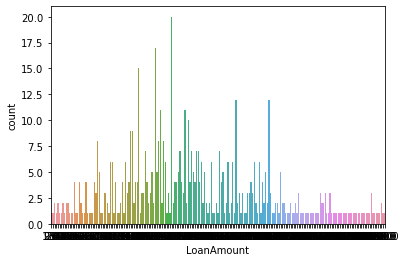

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

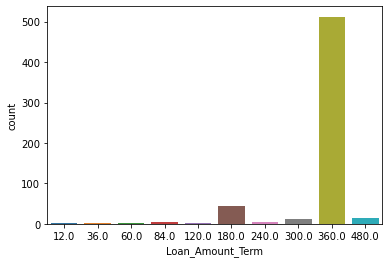

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

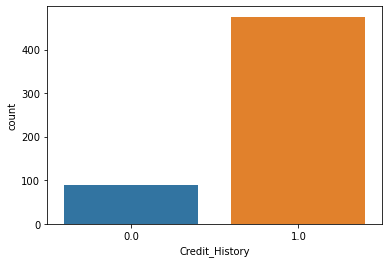

In [7]:
for i in train.describe().columns:
    sns.countplot(train[i])
    plt.show()

In [8]:
 train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

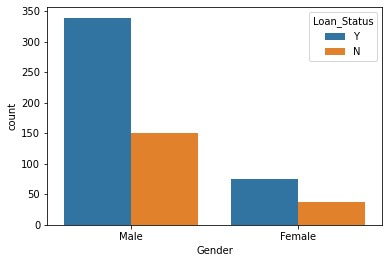

In [10]:
sns.countplot(x=train["Gender"], hue='Loan_Status', data=train)

male and female both are eligible for loan. count of male is greater then female

<IPython.core.display.Javascript object>

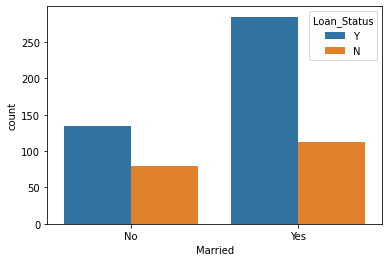

In [11]:
sns.countplot(train["Married"], hue="Loan_Status", data=train)

<IPython.core.display.Javascript object>

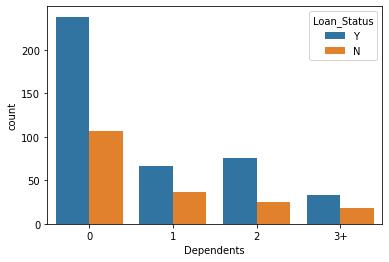

In [12]:
sns.countplot(train["Dependents"], hue="Loan_Status", data=train)

applicants having 0 dependants are more eligible for loan as compared to 1,2,3 dependants

In [13]:
train["Dependents"]=train["Dependents"].str.replace("+", " ")

In [14]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3      51
Name: Dependents, dtype: int64

In [15]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<IPython.core.display.Javascript object>

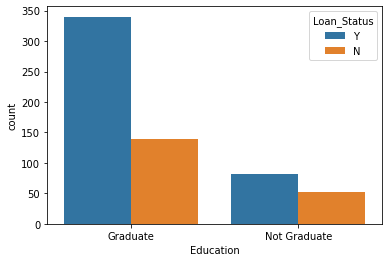

In [16]:
sns.countplot(train["Education"], hue="Loan_Status", data=train)

applicants who are graduate are eligible for loan as compared to not graduate

In [17]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<IPython.core.display.Javascript object>

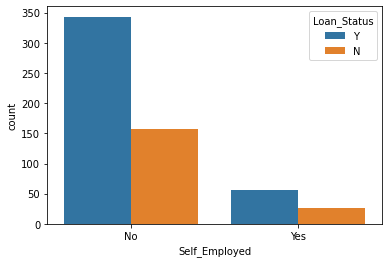

In [18]:
sns.countplot(train["Self_Employed"], hue="Loan_Status", data=train)

count of applicants who are not self empolyed is large as compared to applicants who are self employed

<IPython.core.display.Javascript object>

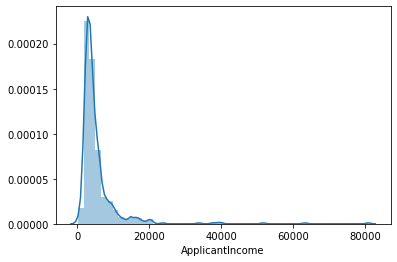

In [19]:
sns.distplot(train["ApplicantIncome"])

here we can see that it is not normally distributed it having skew so that we reduce the skew using log transform

In [20]:
train["ApplicantIncome"]=np.log(train["ApplicantIncome"])

<IPython.core.display.Javascript object>

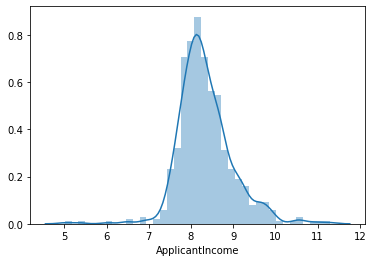

In [21]:
sns.distplot(train["ApplicantIncome"])

<IPython.core.display.Javascript object>

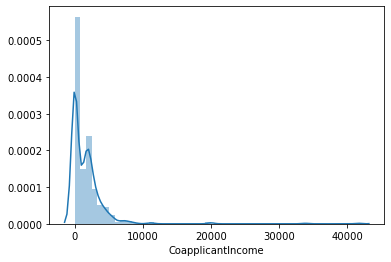

In [22]:
 sns.distplot(train["CoapplicantIncome"])

In [23]:
sum(train["CoapplicantIncome"]==0)

273

In [24]:
train.loc[:, "CoapplicantIncome"].replace([0], train["CoapplicantIncome"].median(), inplace=True)

<IPython.core.display.Javascript object>

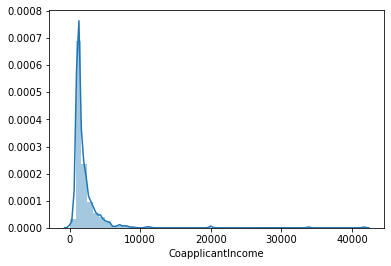

In [25]:
sns.distplot(train["CoapplicantIncome"])

<IPython.core.display.Javascript object>

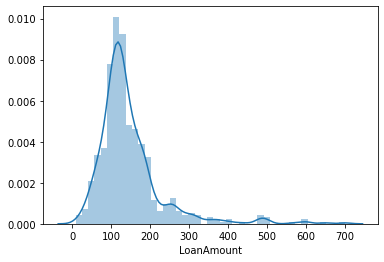

In [26]:
sns.distplot(train["LoanAmount"])

In [27]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<IPython.core.display.Javascript object>

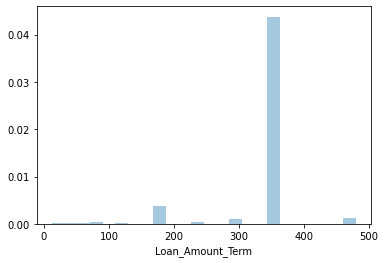

In [29]:
sns.distplot(train["Loan_Amount_Term"])

In [30]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<IPython.core.display.Javascript object>

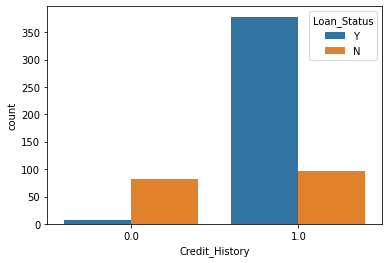

In [31]:
sns.countplot(train["Credit_History"], hue="Loan_Status", data=train)

applicants having good credit history are more eligible to loan as compared to having bad credit historyS

In [32]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<IPython.core.display.Javascript object>

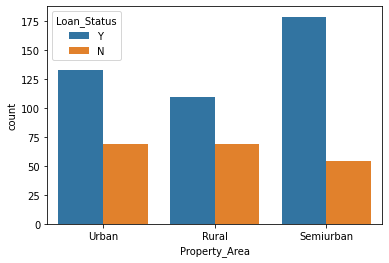

In [33]:
sns.countplot(train["Property_Area"], hue='Loan_Status', data=train)

<IPython.core.display.Javascript object>

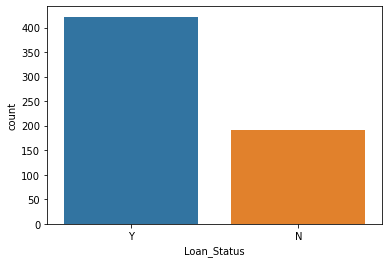

In [34]:
sns.countplot(train["Loan_Status"])

applicants which are eligible to loan having high count as compared to which are not eligible 

In [35]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<IPython.core.display.Javascript object>

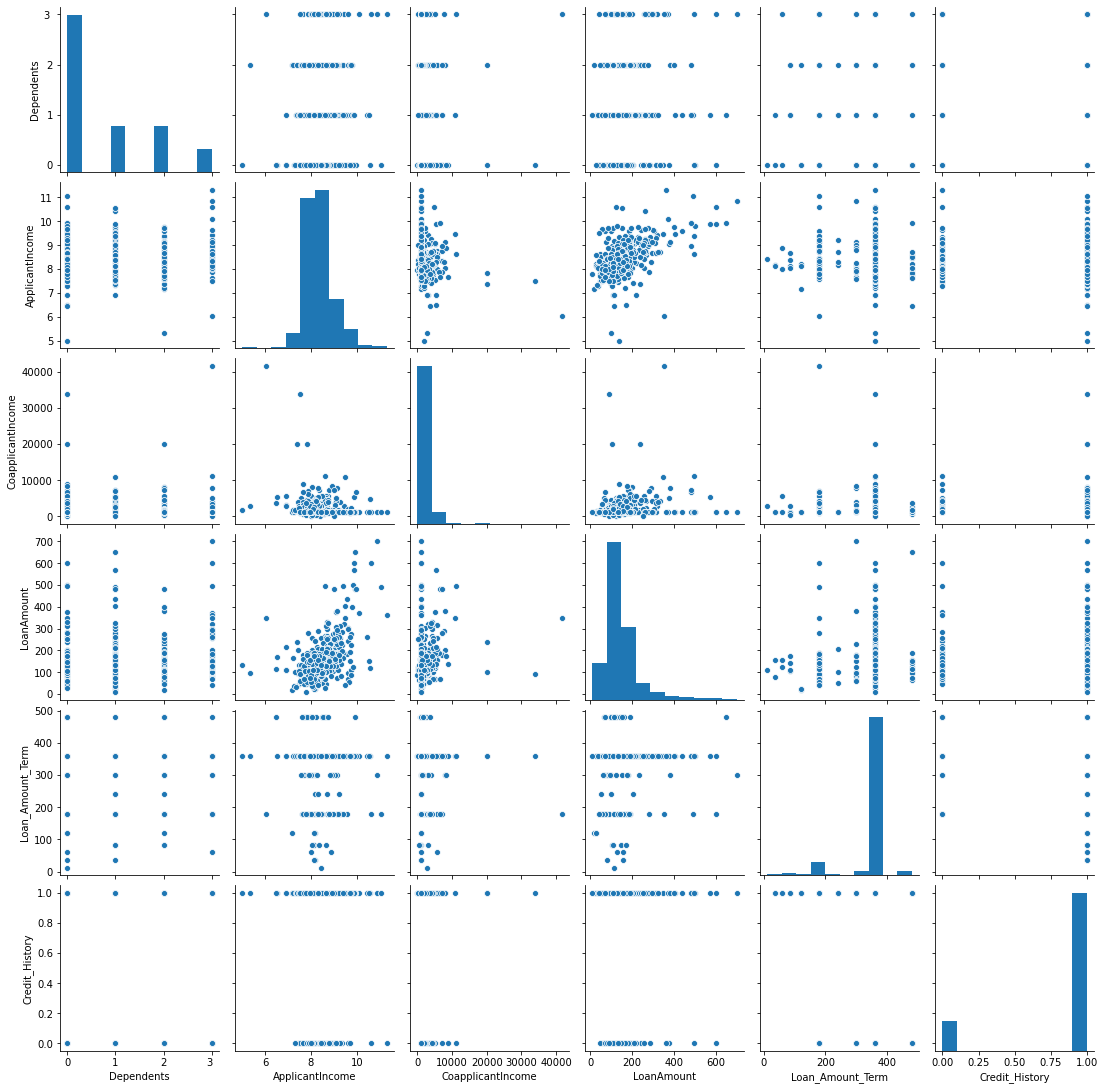

In [36]:
sns.pairplot(train)

<IPython.core.display.Javascript object>

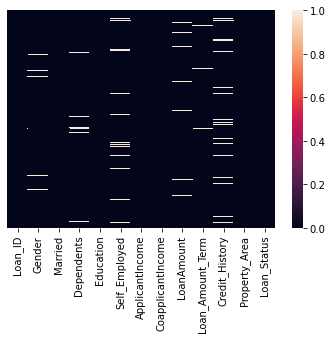

In [37]:
sns.heatmap(train.isnull(), yticklabels=False)

### data processing

In [38]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
print(f'percentage of missing value in embarked column is:{train["Gender"].isnull().sum()/train.shape[0]*100}')
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)


percentage of missing value in embarked column is:2.1172638436482085


In [40]:
print(f'percentage of missing values in married column:{train["Married"].isnull().sum()/train.shape[0]*100}')
train["Married"].fillna(train["Married"].mode()[0], inplace= True)

percentage of missing values in married column:0.4885993485342019


In [41]:
 print(f'percentage of missing values in dependants column:{train["Dependents"].isnull().sum()/train.shape[0]*100}')
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)

percentage of missing values in dependants column:2.44299674267101


In [42]:
print(f'percenyage of missing values in self employed columns:{train["Self_Employed"].isnull().sum()/train.shape[0]*100}')
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)

percenyage of missing values in self employed columns:5.211726384364821


In [43]:
train["LoanAmount"].fillna(train["LoanAmount"].mean(), inplace=True)

In [44]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

In [45]:
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)

In [46]:
loan_amount_term_dummies=pd.get_dummies(train["Loan_Amount_Term"], prefix="LT", prefix_sep="_")

In [47]:
 loan_amount_term_dummies=loan_amount_term_dummies.drop(["LT_120.0", "LT_360.0", "LT_60.0", "LT_12.0"], axis=1)

In [48]:
train=pd.concat([train, loan_amount_term_dummies], axis=1)
train=train.drop(["Loan_Amount_Term"], axis=1)

In [49]:
gender_dummy=pd.get_dummies(train["Gender"], prefix="gender", prefix_sep="-")
train=pd.concat([train, gender_dummy], axis=1 )
train=train.drop(["Gender"], axis=1)


In [50]:
education_dummy=pd.get_dummies(train["Education"], prefix="edu", prefix_sep="-")
train=pd.concat([train, education_dummy], axis=1 )
train=train.drop(["Education"], axis=1)

In [51]:
Married_dummy=pd.get_dummies(train["Married"], prefix="Married", prefix_sep="-" )
train=pd.concat([train, Married_dummy], axis=1 )
train=train.drop(["Married"], axis=1)

In [52]:
Dependents_dummy=pd.get_dummies(train["Dependents"], prefix="dep", prefix_sep="-")
train=pd.concat([train, Dependents_dummy], axis=1 )
train=train.drop(["Dependents"], axis=1)

In [53]:
Self_Employed_dummy=pd.get_dummies(train["Self_Employed"], prefix="self_emp", prefix_sep="-" )
train=pd.concat([train, Self_Employed_dummy], axis=1 )
train=train.drop(["Self_Employed"], axis=1)

In [54]:
Property_Area_dummy=pd.get_dummies(train["Property_Area"], prefix="Property_Area", prefix_sep="-" )
train=pd.concat([train, Property_Area_dummy], axis=1 )
train=train.drop(["Property_Area"], axis=1)

In [55]:
train.dtypes

Loan_ID                     object
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Credit_History             float64
Loan_Status                 object
LT_36.0                      uint8
LT_84.0                      uint8
LT_180.0                     uint8
LT_240.0                     uint8
LT_300.0                     uint8
LT_480.0                     uint8
gender-Female                uint8
gender-Male                  uint8
edu-Graduate                 uint8
edu-Not Graduate             uint8
Married-No                   uint8
Married-Yes                  uint8
dep-0                        uint8
dep-1                        uint8
dep-2                        uint8
dep-3                        uint8
self_emp-No                  uint8
self_emp-Yes                 uint8
Property_Area-Rural          uint8
Property_Area-Semiurban      uint8
Property_Area-Urban          uint8
dtype: object

In [56]:
train.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Loan_Status', 'LT_36.0', 'LT_84.0', 'LT_180.0',
       'LT_240.0', 'LT_300.0', 'LT_480.0', 'gender-Female', 'gender-Male',
       'edu-Graduate', 'edu-Not Graduate', 'Married-No', 'Married-Yes',
       'dep-0', 'dep-1', 'dep-2', 'dep-3 ', 'self_emp-No', 'self_emp-Yes',
       'Property_Area-Rural', 'Property_Area-Semiurban',
       'Property_Area-Urban'],
      dtype='object')

In [57]:
col=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'LT_36.0', 'LT_84.0', 'LT_180.0',
       'LT_240.0', 'LT_300.0', 'LT_480.0', 'gender-Female', 'gender-Male',
       'edu-Graduate', 'edu-Not Graduate', 'Married-No', 'Married-Yes',
       'dep-0', 'dep-1', 'dep-2', 'dep-3 ', 'self_emp-No', 'self_emp-Yes',
       'Property_Area-Rural', 'Property_Area-Semiurban',
       'Property_Area-Urban']

In [58]:
train["Loan_Status"]=pd.get_dummies(train["Loan_Status"])
train["Loan_Status"].dtypes

dtype('uint8')

In [59]:
x=train[col]
y=train["Loan_Status"]

In [60]:
logreg = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(logreg, 20)
rfe = rfe.fit(x, y)
 
print(F'Selected features:{list(x.columns[rfe.support_])}')

Selected features:['Credit_History', 'LT_36.0', 'LT_84.0', 'LT_180.0', 'LT_240.0', 'LT_300.0', 'LT_480.0', 'gender-Female', 'gender-Male', 'edu-Graduate', 'edu-Not Graduate', 'Married-No', 'Married-Yes', 'dep-0', 'dep-1', 'dep-2', 'self_emp-No', 'Property_Area-Rural', 'Property_Area-Semiurban', 'Property_Area-Urban']


In [61]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(x, y)

print(f'optimal number of features are: {rfecv.n_features_}')
print(f'Selected features:{list(x.columns[rfecv.support_])}')

optimal number of features are: 25
Selected features:['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'LT_36.0', 'LT_84.0', 'LT_180.0', 'LT_240.0', 'LT_300.0', 'LT_480.0', 'gender-Female', 'gender-Male', 'edu-Graduate', 'edu-Not Graduate', 'Married-No', 'Married-Yes', 'dep-0', 'dep-1', 'dep-2', 'dep-3 ', 'self_emp-No', 'self_emp-Yes', 'Property_Area-Rural', 'Property_Area-Semiurban', 'Property_Area-Urban']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

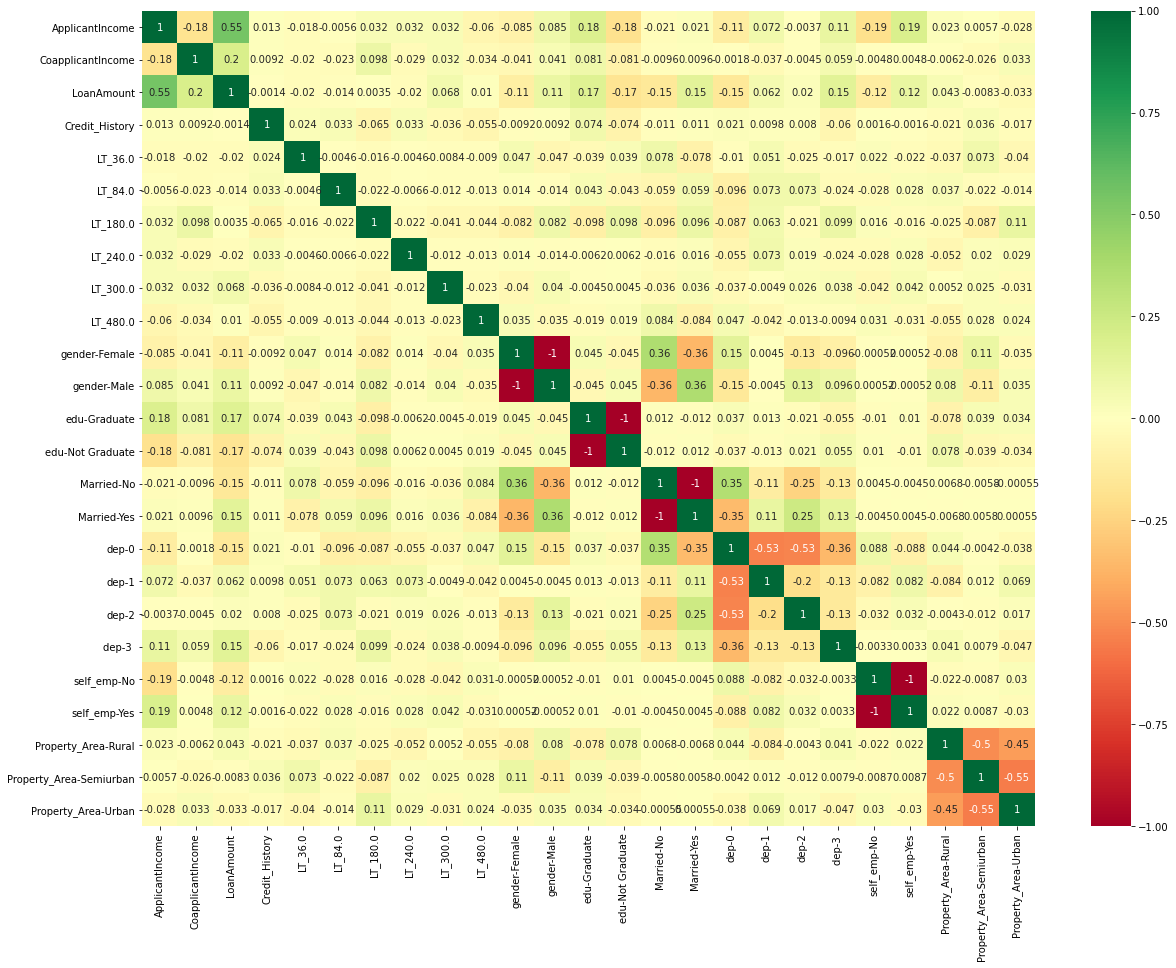

In [62]:
selected_features=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'LT_36.0', 'LT_84.0', 'LT_180.0', 
                   'LT_240.0', 'LT_300.0', 'LT_480.0', 'gender-Female', 'gender-Male', 'edu-Graduate', 'edu-Not Graduate', 
                   'Married-No', 'Married-Yes', 'dep-0', 'dep-1', 'dep-2', 'dep-3 ', 'self_emp-No', 'self_emp-Yes', 
                   'Property_Area-Rural', 'Property_Area-Semiurban', 'Property_Area-Urban']
X=train[selected_features]
 
plt.subplots(figsize=(20,15))
sns.heatmap(X.corr(), annot=True,  cmap="RdYlGn")



### Train Test Split

In [63]:
X=train.drop(["Loan_Status", "Loan_ID"], axis=1)
Y=train["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Define model

In [64]:
logreg = LogisticRegression()


In [65]:
logreg.fit(X_train, y_train)

LogisticRegression()

### Prediction

In [66]:
# make class predictions for the testing set
y_pred_proba = logreg.predict_proba(X_test)[:,1]

In [67]:
roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

0.7475579975579976

In [68]:
roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])

0.806706114398422

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [74]:
y_pred=logreg.predict(X_test)

### Accuracy

In [75]:

print(f'Accuracy of logistic regression is:{accuracy_score(y_test, y_pred)}')

Accuracy of logistic regression is:0.7642276422764228


### Log loss

In [76]:
print(f'log loss of logistic regression is :{log_loss(y_test, y_pred_proba)}')

log loss of logistic regression is :0.5228327614703362


In [77]:
print(f'logistic regression auc is:{auc(fpr, tpr)}')

logistic regression auc is:0.7475579975579976


### Roc Auc plot

In [78]:
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

fpr_tr, tpr_tr, thresholds_roc = roc_curve(y_train, logreg.predict_proba(X_train)[:, 1])
roc_auc_tr = auc(fpr_tr, tpr_tr)

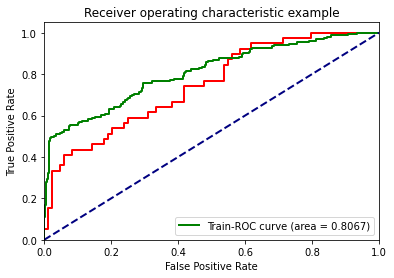

In [79]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color="red", lw=2)
plt.plot(
    fpr_tr,
    tpr_tr,
    color="green",
    lw=2,
    label="Train-ROC curve (area = %0.4f)" % roc_auc_tr,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [80]:
filename = 'D:\\Data\\final_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

<IPython.core.display.Javascript object>

In [81]:
loaded_model = pickle.load(open(filename, 'rb'))

<IPython.core.display.Javascript object>

In [82]:
train_pred = loaded_model.predict_proba(X_train)
test_pred = loaded_model.predict_proba(X_test)
 

In [88]:
test=test.drop(["Loan_ID"], axis=1, inplace=True)

In [94]:
test_orig_pred = loaded_model.predict_proba(test).reshape(1,-1)

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [95]:
roc_auc_score(y_train, train_pred[:,1])

0.806706114398422

In [97]:
roc_auc_score(y_test, test_pred[:,1])

0.7475579975579976